# The Sparks Foundation


# Data Science and Business Analytics

## GRIP TASK - 2 

## By: Ashutosh Pawar
## Prediction Using Decision Tree Algorithm in Python
To create a decision tree classifier and visualize it graphically.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

# Importing Required Packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Datasets

In [3]:
Iris_data = pd.read_csv('Iris.csv')

X = Iris_data.iloc[:, 1:-1].values #independent variables-(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalwidthCm)
y = Iris_data.iloc[:, -1].values   #dependent/target variable- (Species)

# Exploring the dataset


In [4]:
Iris_data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
Iris_data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
Iris_data.describe()  


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
Iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

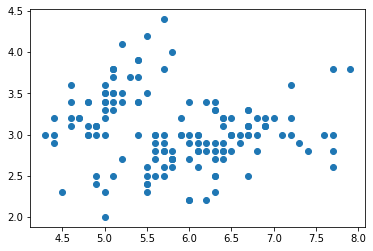

In [9]:
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

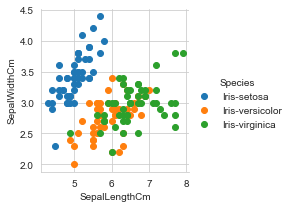

In [10]:
#Using Seaborn lib to visualize 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(Iris_data, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

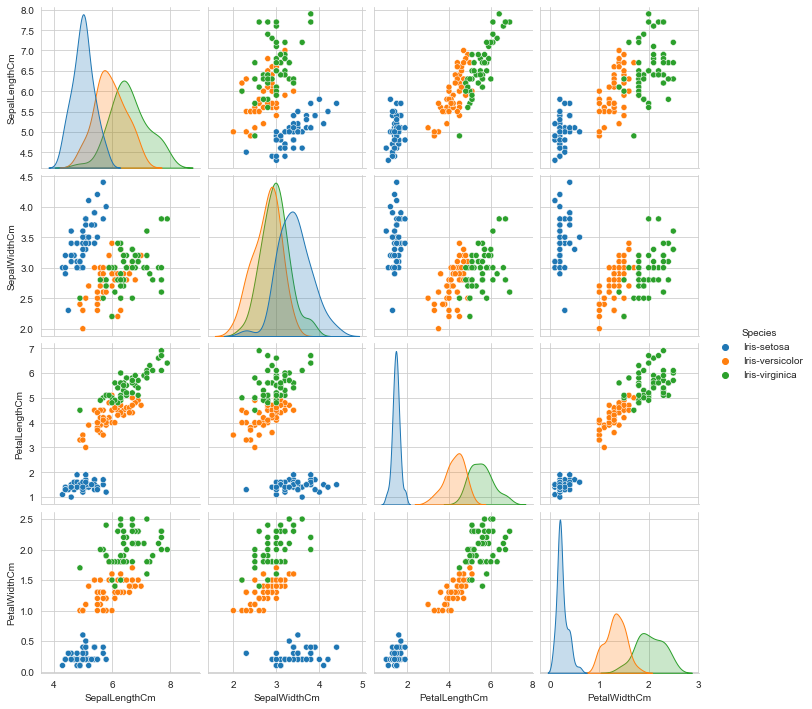

In [11]:
#Pair plot gives the relationship b/w all the features' distribution with each other

sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

All Blue points are well seperated from the other two classes


# Splitting the data into training and test set



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Defining the Decision Tree Algorithm

In [13]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree can be used both in classification and regression problem. 
dtree = DecisionTreeClassifier(max_depth = 5)  #classifer used to predict the class/category
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
y_predict = dtree.predict(X_test)

## Visualizing the Decision Tree 

In [15]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']    

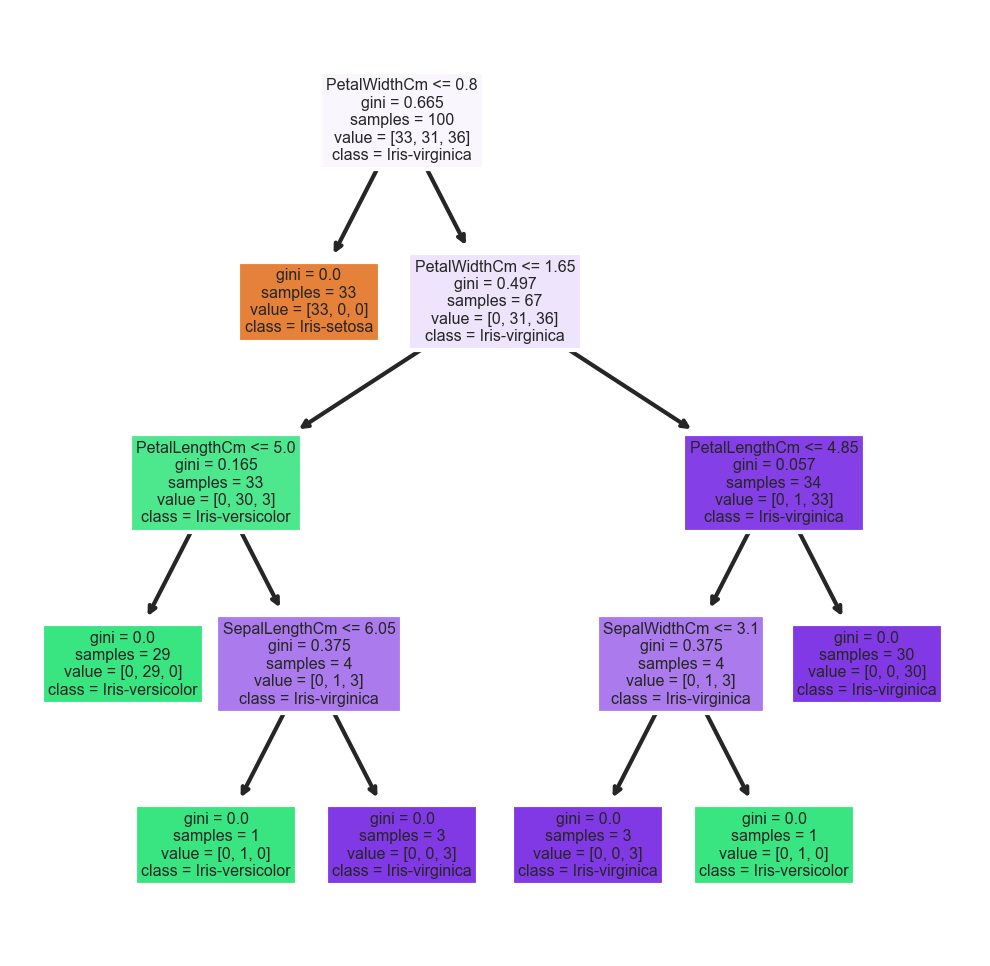

In [16]:
from sklearn.tree import plot_tree
from sklearn import tree
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dtree,feature_names=features,class_names=targets,filled=True)
plt.show(fig.savefig)